In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

In [7]:
class DiscreteRandomVariables:
    def __init__(self,low=0, high=1):
        self.variableType = ""
        self.low = low
        self.high = high
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

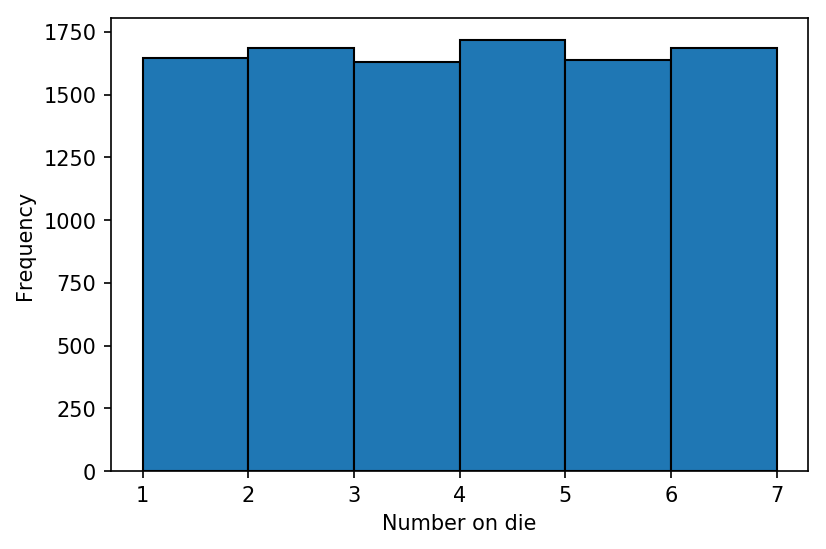

In [76]:
dv = DiscreteRandomVariables(1,7)
plt.hist(dv.draw(10000), bins=[1,2,3,4,5,6,7], edgecolor='black', align='mid')
plt.xlabel('Number on die')
plt.ylabel('Frequency');

In [20]:
class BinomialRandomVariables(DiscreteRandomVariables):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials,self.probabilityOfSuccess,numberOfSamples)
        return samples

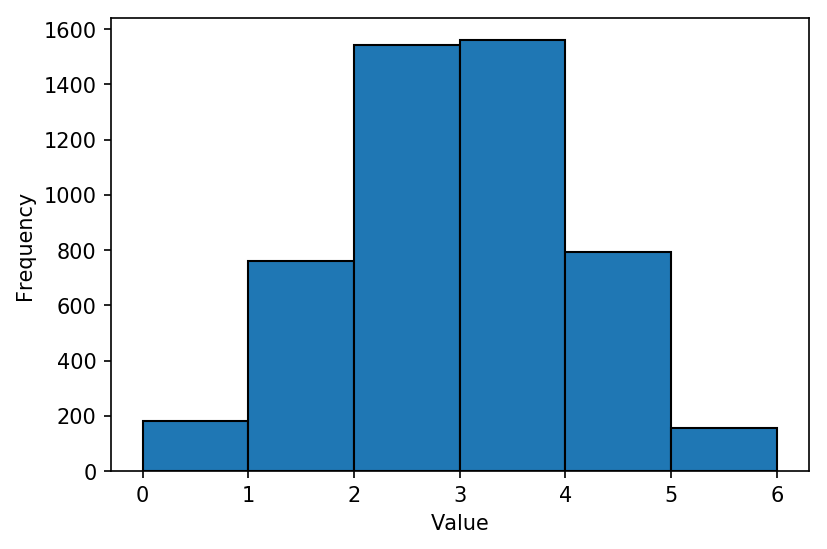

In [77]:
bv = BinomialRandomVariables(5,0.5)
plt.hist(bv.draw(5000),bins=[0,1,2,3,4,5,6],edgecolor='black',align='mid')
plt.xlabel('Value')
plt.ylabel('Frequency');

In [25]:
class ContinousRandomVariables:
    def __init__(self,low=0, high=1):
        self.variableType = ""
        self.low = low
        self.high = high
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

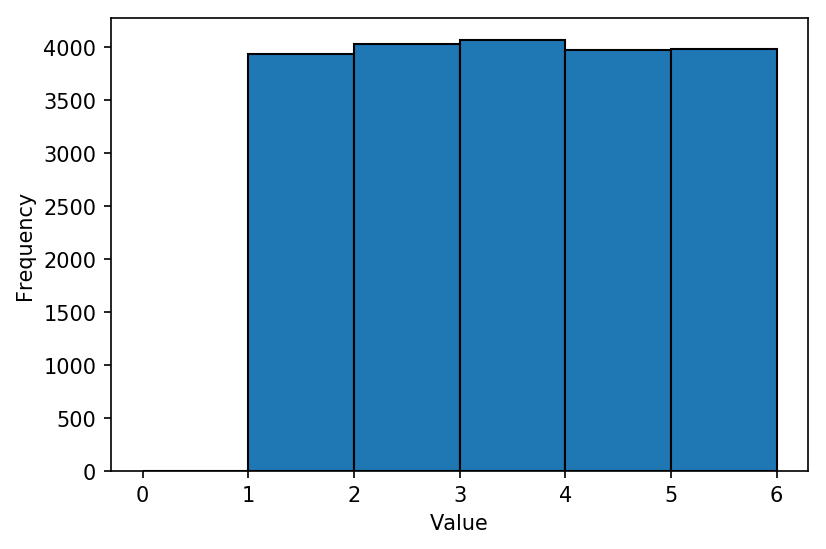

In [78]:
cv = ContinousRandomVariables(1,6)
plt.hist(cv.draw(20000),bins=[0,1,2,3,4,5,6],edgecolor = 'black',align = 'mid')
plt.xlabel('Value')
plt.ylabel('Frequency');

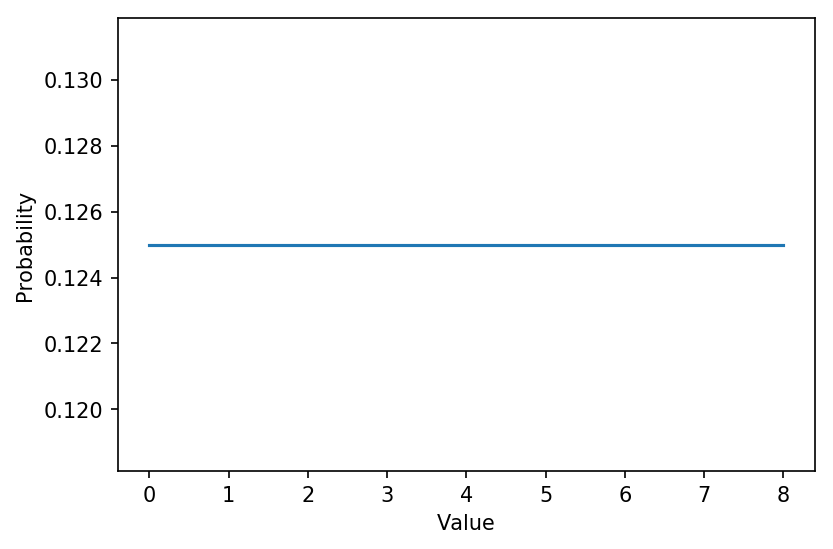

In [79]:
a = 0
b = 8
x = np.linspace(a,b,100)
y = [1/(b-a) for i in x]
plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('Probability');

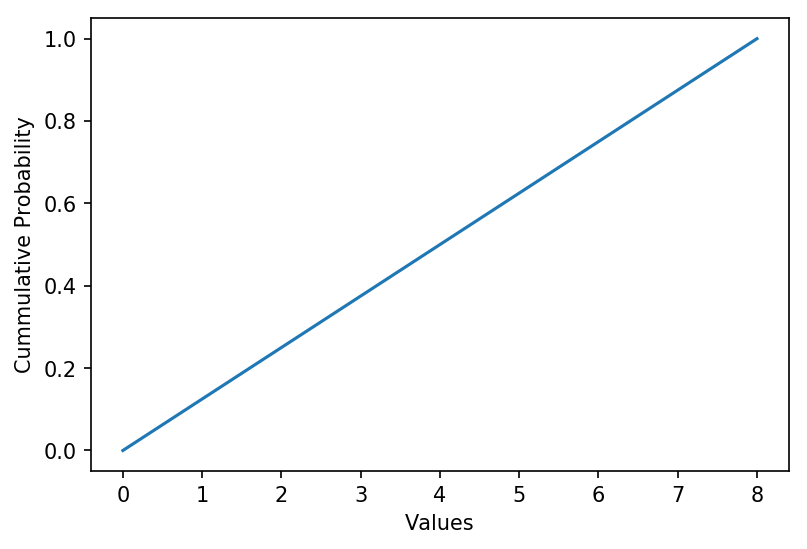

In [80]:
z = [(i-a)/(b-a) for i in x]
plt.plot(x,z)
plt.xlabel('Values')
plt.ylabel('Cummulative Probability');

In [32]:
class NormalRandomVariables(ContinousRandomVariables):
    def __init__(self, mean=0, variance = 1):
        ContinousRandomVariables.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.variance = variance
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean,self.variance,numberOfSamples)
        return samples

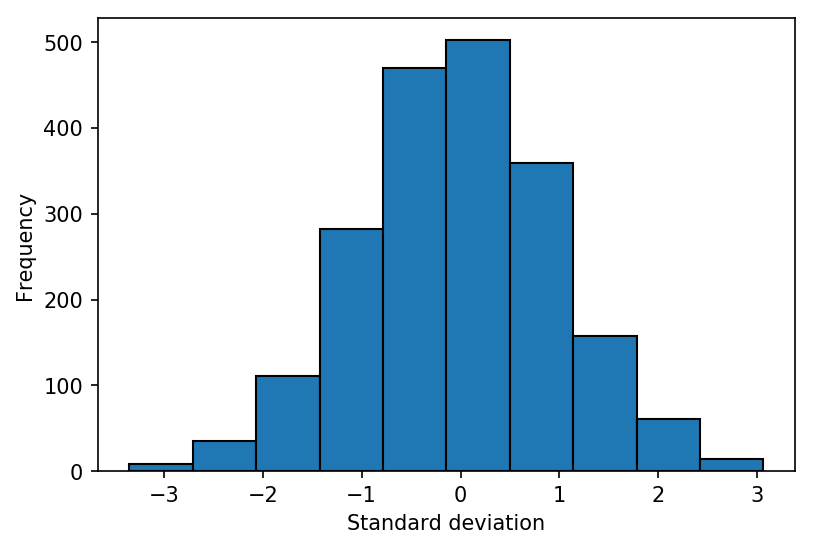

In [66]:
nrv = NormalRandomVariables(0,1)
plt.hist(nrv.draw(2000),edgecolor='black', align = 'mid')
plt.xlabel('Standard deviation')
plt.ylabel('Frequency')
plt.rcParams['figure.dpi']=150;

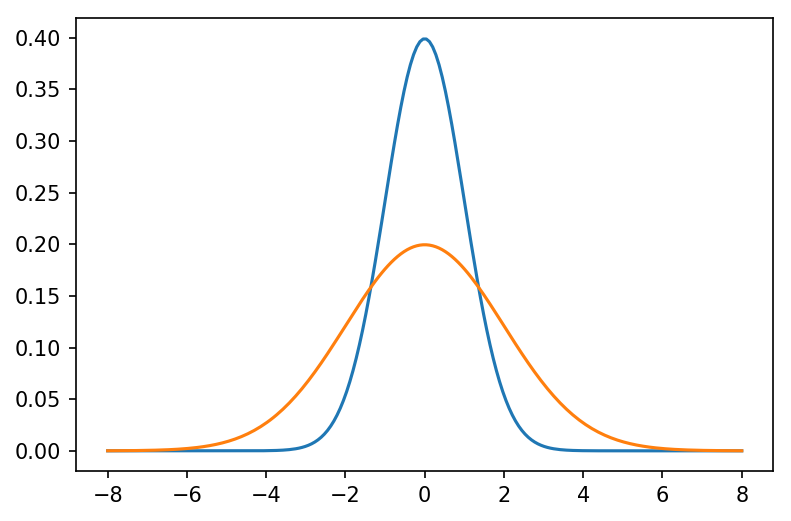

In [67]:
mean1 = 0
mean2 = 0
stdev1 = 1
stdev2 = 2
num = np.linspace(-8,8,200)
dist1 = (1/(stdev1*np.sqrt(2*3.14159)))*np.exp(-(num-mean1)*(num-mean1)/(2*stdev1*stdev1))
dist2 = (1/(stdev2*np.sqrt(2*3.14159)))*np.exp(-(num-mean2)*(num-mean2)/(2*stdev2*stdev2))
plt.plot(num,dist1,num,dist2);

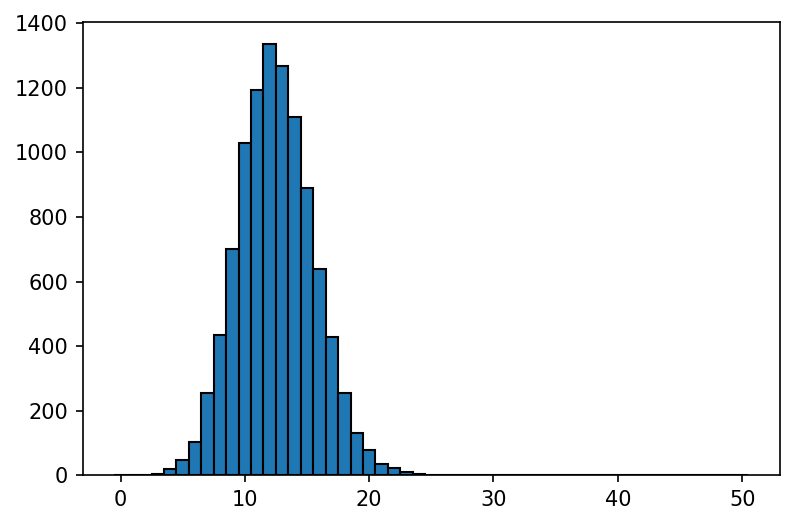

In [68]:
n = 50
p = 0.25
d1 = BinomialRandomVariables(n,p)
d2 = d1.draw(10000)
z_values = (d2 - n*p)/(n*p*(1-p))
plt.hist(d2,bins=range(0,n+2), align = 'left', edgecolor='black');

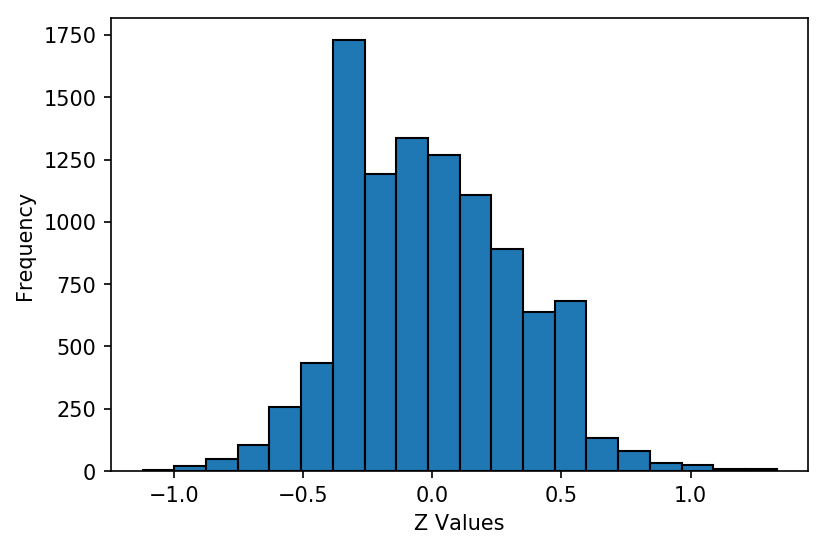

In [69]:
plt.hist(z_values,bins=20,edgecolor='black')
plt.xlabel('Z Values')
plt.ylabel('Frequency');

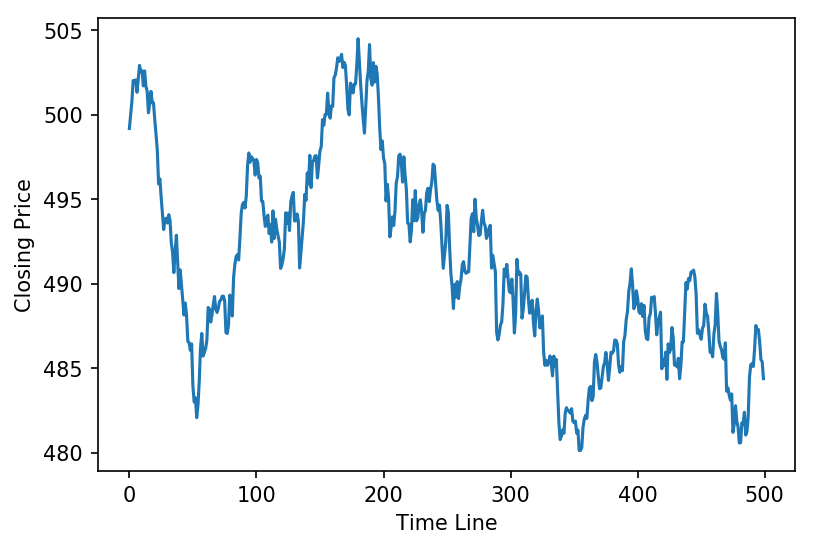

In [70]:
stock_initial = 500
i=NormalRandomVariables(0,1)
i_returns = i.draw(500)
stock_close = pd.Series(np.cumsum(i_returns),name='Close') + stock_initial
stock_close.plot()
plt.xlabel('Time Line')
plt.ylabel('Closing Price');

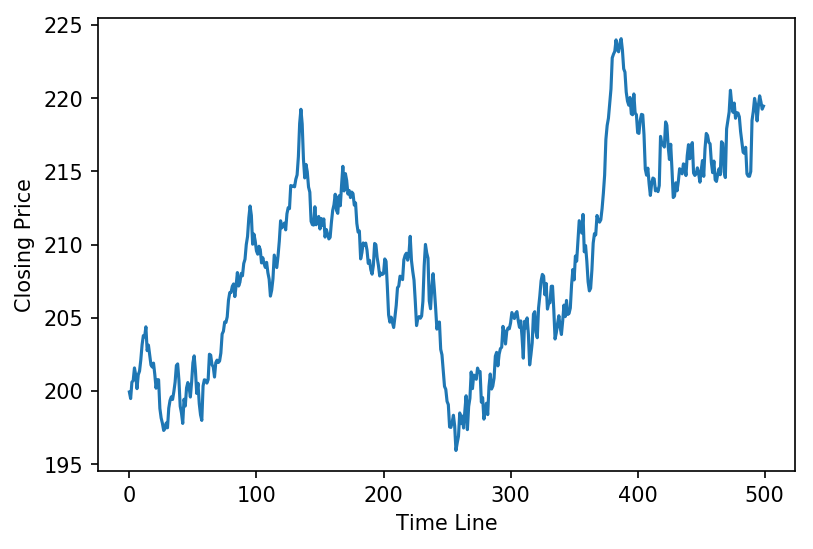

In [71]:
stock2_initial = 200
i2=NormalRandomVariables(0,1)
i2_returns = i2.draw(500)
stock2_close = pd.Series(np.cumsum(i2_returns),name='Close') + stock2_initial
stock2_close.plot()
plt.xlabel('Time Line')
plt.ylabel('Closing Price');

In [50]:
num1 = 45
num2 = 55
w1 = num1/(num1 + num2)
w2 = num2/(num1+num2)
port_initial = w1*(stock_initial) + w2*(stock2_initial)
port_ret = (i_returns * w1) + (i2_returns * w2)
comb_close = pd.Series(np.cumsum(port_ret),name='Close') + port_initial

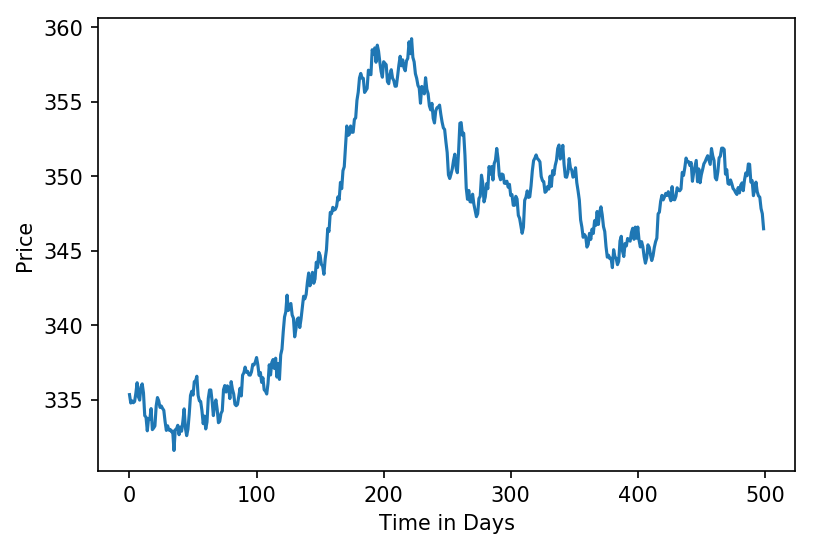

In [72]:
comb_close.plot()
plt.xlabel('Time in Days')
plt.ylabel('Price');

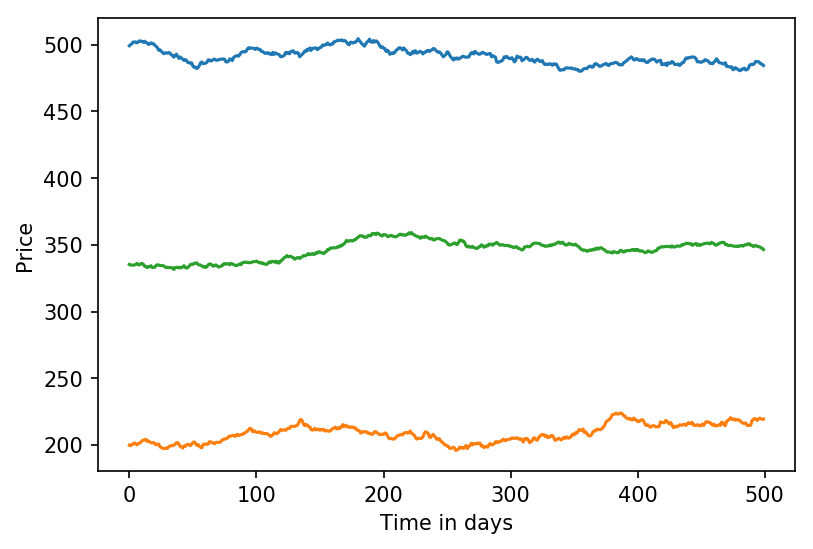

In [73]:
sum_vis = pd.concat([stock_close,stock2_close,comb_close], axis = 1)
plt.plot(sum_vis)
plt.xlabel('Time in days')
plt.ylabel('Price');

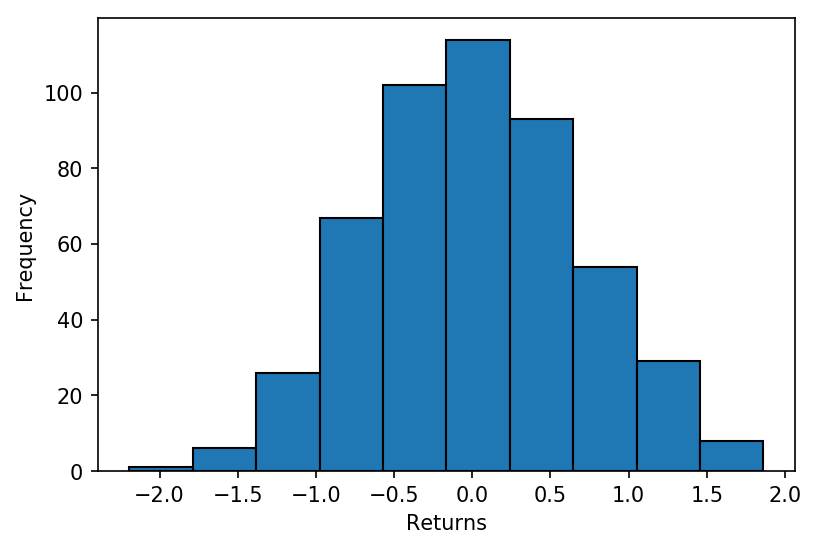

In [74]:
plt.hist(port_ret,edgecolor='black')
plt.xlabel('Returns')
plt.ylabel('Frequency');

In [57]:
import pandas_datareader as pdr

In [60]:
amzn = pdr.get_data_yahoo('AMZN', start='2015-1-1', end='2016-1-1')
amzn=amzn['Close']
amzn_ret = amzn.pct_change()[1:]

In [61]:
_, pval, skewness, kurtosis = stattools.jarque_bera(amzn_ret)

In [62]:
print('p value is ', pval)
print('Is the nul hyposthsis rejected', pval < 0.01)
print('The skewness of Amazon returns  ', skewness)
print('The Kurtosis for Amazon returns is', kurtosis)

p value is  0.0
Is the nul hyposthsis rejected True
The skewness of Amazon returns   2.49578359009015
The Kurtosis for Amazon returns is 17.05407322341777


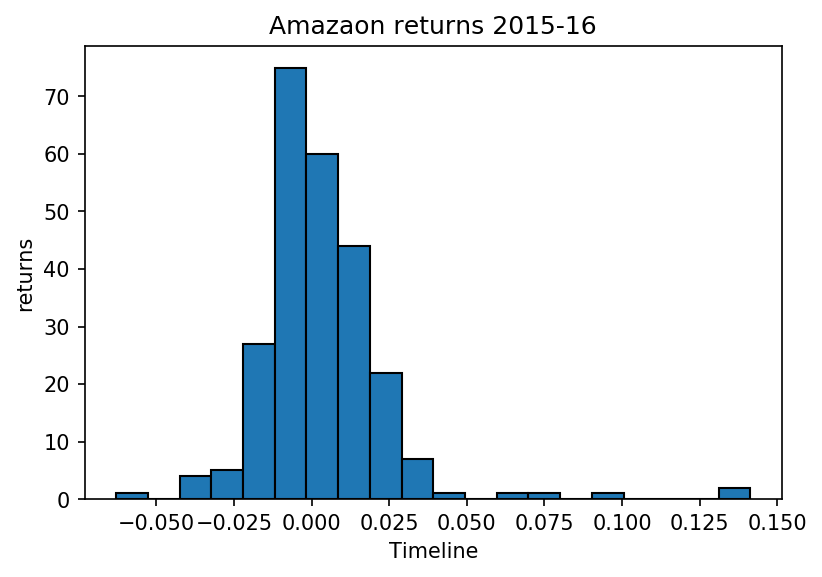

In [75]:
plt.hist(amzn_ret,bins=20,edgecolor='black')
plt.xlabel('Timeline')
plt.ylabel('returns')
plt.title('Amazaon returns 2015-16');